In [1]:
# Import modules. 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Open the file containing the dataset.
dataset = pd.read_csv("/home/andre/Desktop/projeto Renner/dataset.csv")

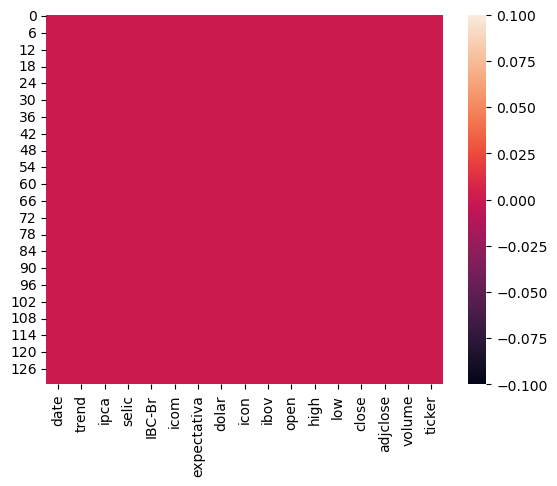

In [3]:
# Checks for the presence of null values in the dataframe
sns.heatmap(dataset.isnull(), cbar = True); # isnull() returns null values.

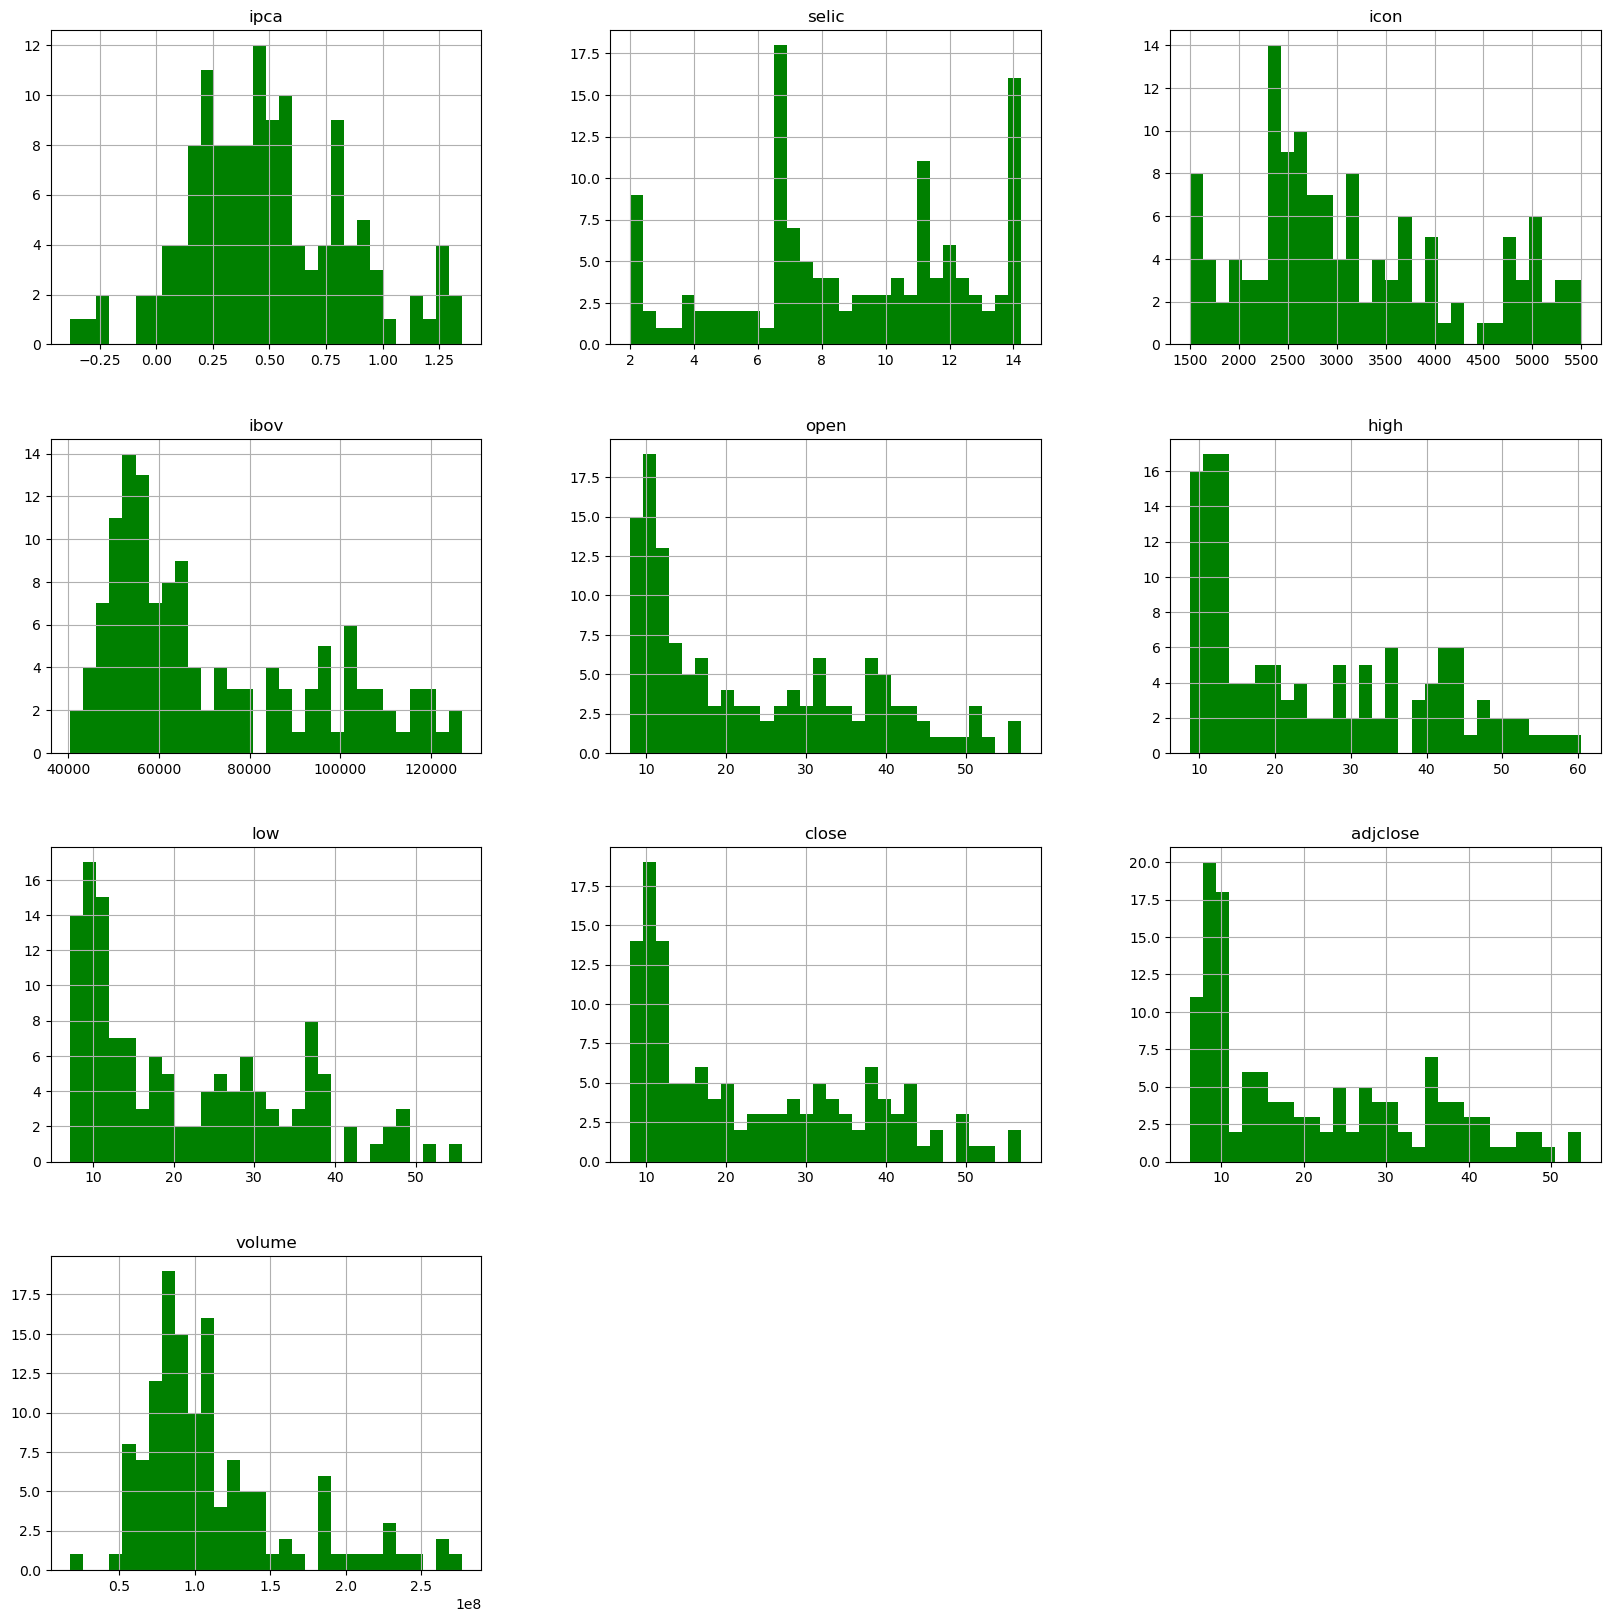

In [4]:
# Generates histograms with the data distribution for each attribute.
dataset.hist(bins = 30, figsize=(20,20), color = 'g');

In [5]:
# Replace the periods by comma. 
dataset['IBC-Br'] = [float(str(i).replace(",", ".")) for i in dataset['IBC-Br']]
dataset['icom'] = [float(str(i).replace(",", ".")) for i in dataset['icom']]
dataset['dolar'] = dataset['dolar'].str.replace(',','.')
dataset['expectativa'] = dataset['expectativa'].str.replace(',','.')

In [6]:
# Remove the columns do not needed.
new_data_set = dataset.drop(columns=['date', 'open', 'high', 'low', 'close', 'adjclose', 'volume', 'ticker'], axis = 1)

In [7]:
# Prints information about the DataFrame.
dataset.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         132 non-null    object 
 1   trend        132 non-null    object 
 2   ipca         132 non-null    float64
 3   selic        132 non-null    float64
 4   IBC-Br       132 non-null    float64
 5   icom         132 non-null    float64
 6   expectativa  132 non-null    object 
 7   dolar        132 non-null    object 
 8   icon         132 non-null    float64
 9   ibov         132 non-null    int64  
 10  open         132 non-null    float64
 11  high         132 non-null    float64
 12  low          132 non-null    float64
 13  close        132 non-null    float64
 14  adjclose     132 non-null    float64
 15  volume       132 non-null    int64  
 16  ticker       132 non-null    object 
dtypes: float64(10), int64(2), object(5)
memory usage: 17.7+ KB


In [8]:
# converting object type column to float.
dataset['dolar'] = dataset['dolar'].astype(float) 
dataset['expectativa'] = dataset['expectativa'].astype(float) 

In [9]:
# Note: The apply() method allows you to apply a function along one of the axis of the DataFrame, default 0, which is the index (row) axis.

In [10]:
new_data_set['trend'] = new_data_set['trend'].apply(lambda x: 1 if x == 'Uptrend' else 0)
new_data_set['trend']

0      1
1      1
2      1
3      1
4      1
      ..
127    0
128    0
129    0
130    0
131    0
Name: trend, Length: 132, dtype: int64

In [11]:
uptrend = new_data_set[new_data_set['trend'] == 1]
downtrend = new_data_set[new_data_set['trend'] == 0]

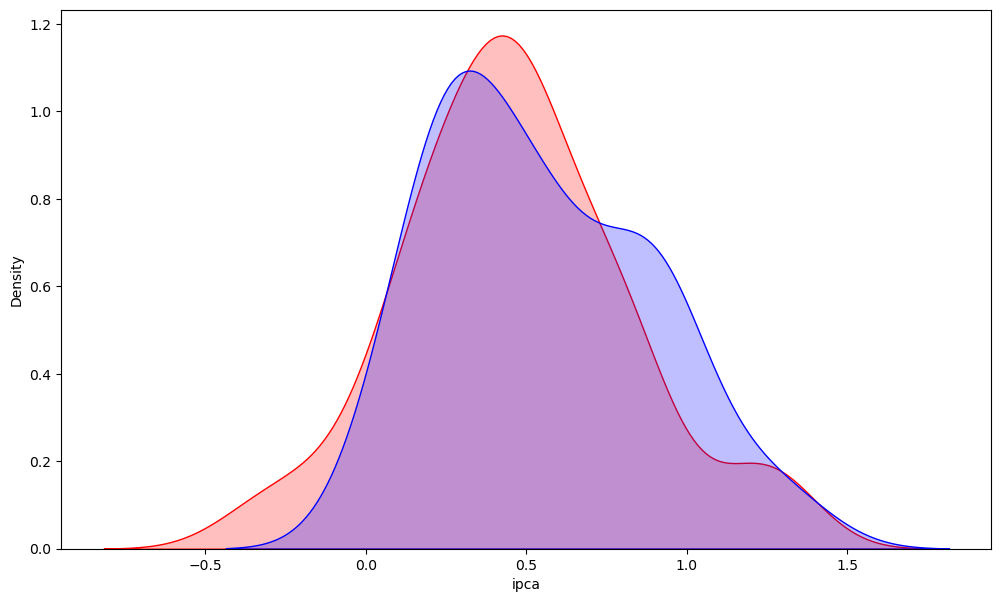

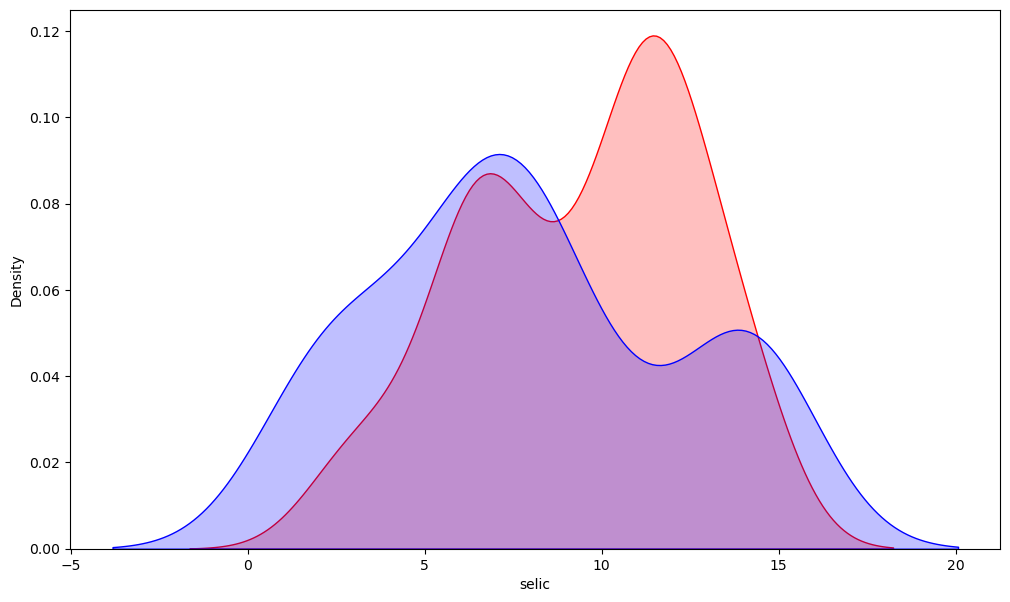

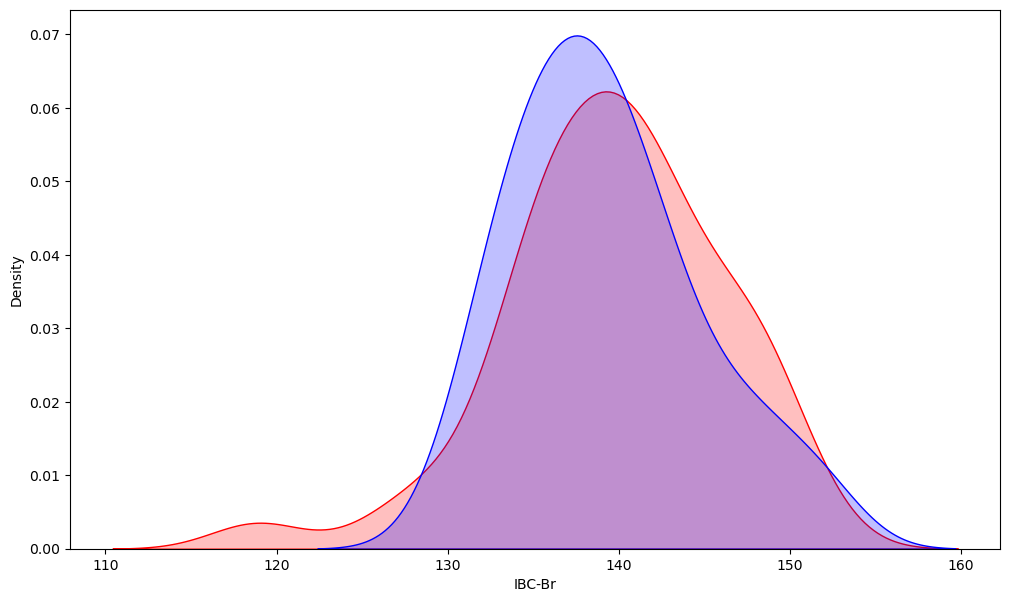

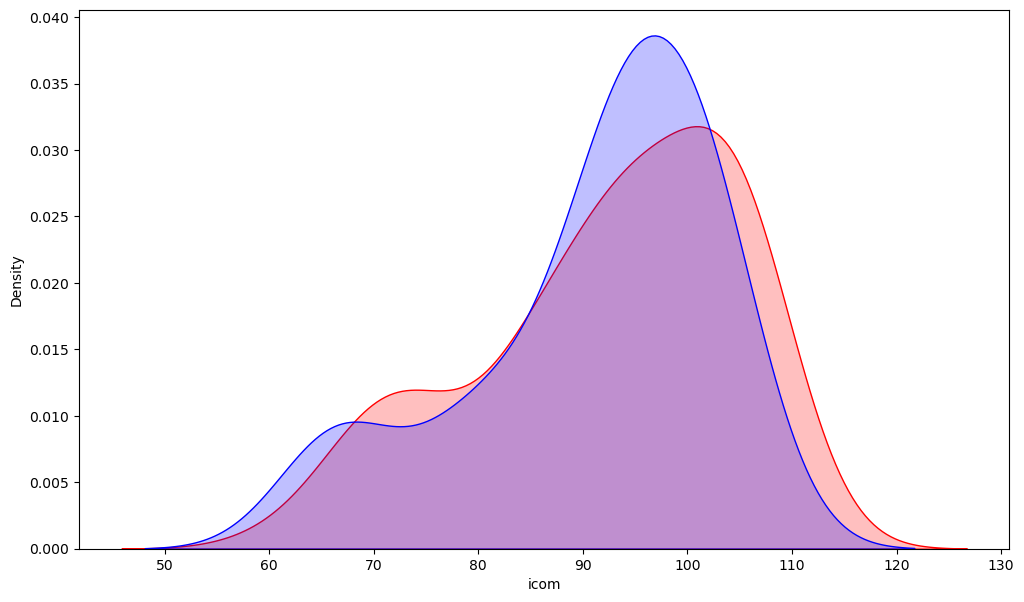

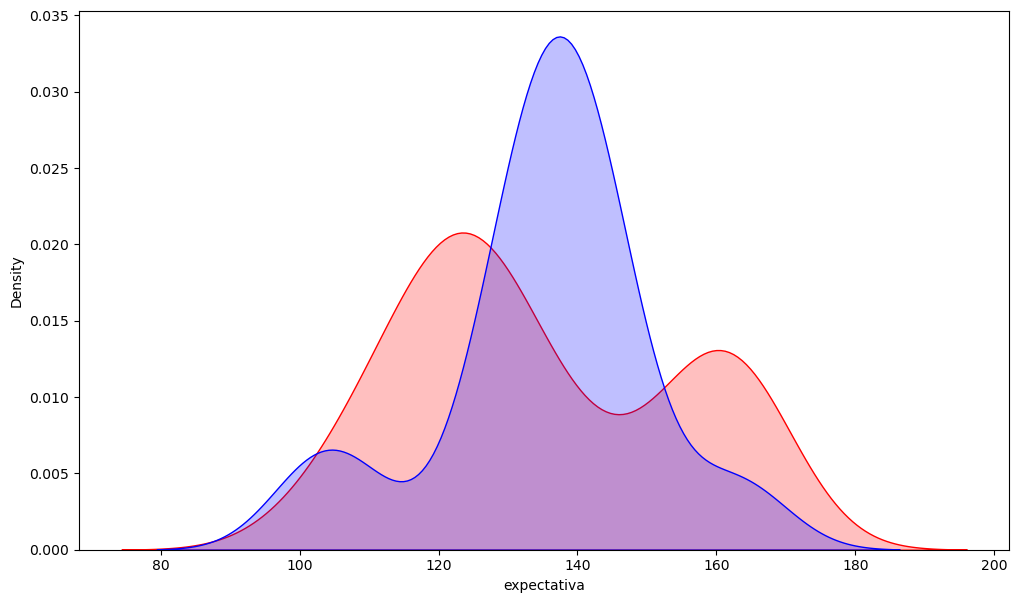

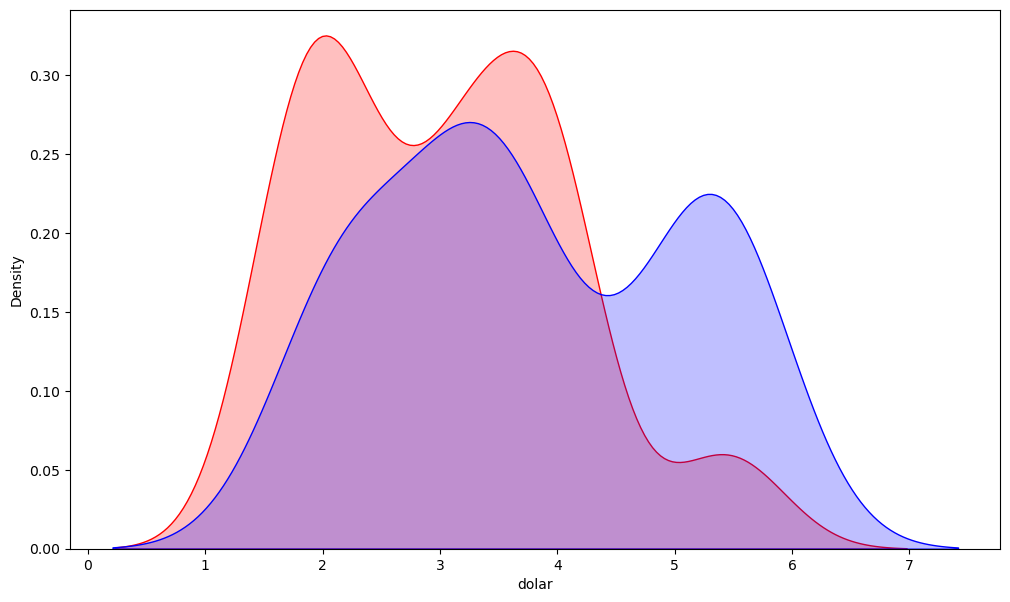

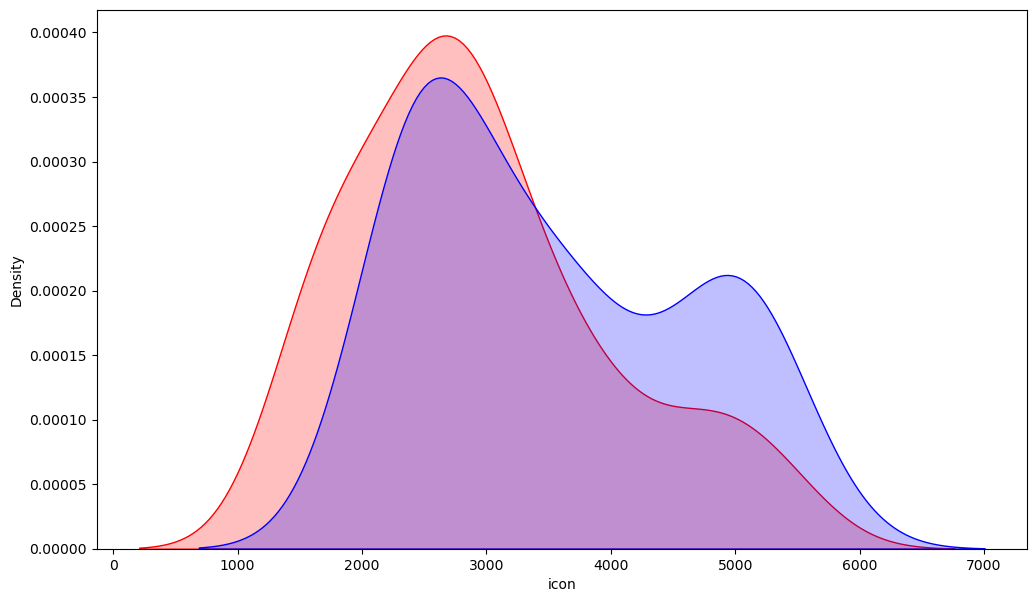

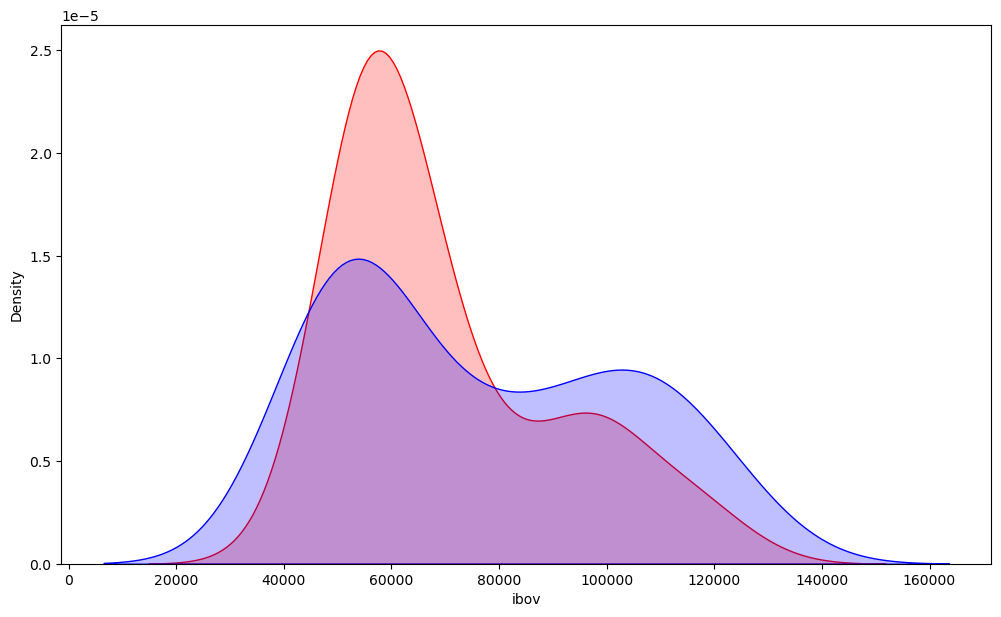

In [12]:
# KDE (Kernel Density Estimate)

def zeigen():
    list_features = ['ipca', 'selic', 'IBC-Br', 'icom', 'expectativa', 'dolar', 'icon', 'ibov']
    for y in range(len(list_features)):
        plt.figure(figsize=(12,7))
        sns.kdeplot(uptrend[list_features[y]].astype(float), label = 'Uptrend', fill = True, color = 'r')
        sns.kdeplot(downtrend[list_features[y]].astype(float), label = 'Downtrend', fill = True, color = 'b');
    
zeigen()    

In [13]:
# Normalize labels. 
# To transform non-numerical labels (as long as they are hashable and comparable) to numerical labels.
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()  
y = labelencoder.fit_transform(new_data_set['trend'])
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [14]:
# Select the macroeconomic indicators.
previsores = new_data_set.drop(['trend', 'ipca', 'expectativa', 'icom', 'IBC-Br', 'selic'], axis = 1)
X = previsores.iloc[:,0:132].values
previsores

,dolar,icon,ibov
0,1.67411428571429,1525.61,66575
1,1.66719,1533.05,67383
2,1.6583,1629.59,68587
3,1.58564736842105,1672.59,66133
4,1.61269090909091,1636.41,64620
...,...,...,...
127,5.25112272727273,5007.44,118781
128,5.27909047619048,4709.56,110979
129,5.539375,4251.43,103501
130,5.55626,3932.70,101915


In [15]:
# Transform features by scaling each feature to a given range.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [16]:
# Split arrays or matrices into random train and test subsets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

X_train.shape, y_train

((99, 3),
 array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
        1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
        1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1]))

In [17]:
# Logistic regression.
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X_train, y_train) 

LogisticRegression()

In [18]:
y_pred = logistic.predict(X_test)
y_pred

y_test

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0])

In [19]:
# Estimate the confusion matrix.
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test, y_pred)  # gera a matriz de confusão, necessária para se obter o recall e o precision
cm

array([[ 6,  8],
       [ 2, 17]])

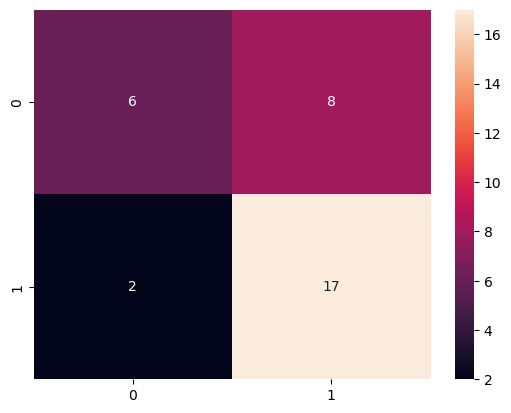

In [20]:
# VIsualize the confusion matrix.
sns.heatmap(cm, annot=True);

In [21]:
# Show the metrics obtained by this model.
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
print("Accuracye : ", accuracy_score(y_test, y_pred))  # Accuracy classification score.
print("Precision : ", precision_score(y_test, y_pred))
print("Recall ...: ", recall_score(y_test, y_pred))
print("F1 Score .: ", f1_score(y_test, y_pred, average='macro'))

Accuracye :  0.696969696969697
Precision :  0.68
Recall ...:  0.8947368421052632
F1 Score .:  0.6590909090909091


In [22]:
# Build a text report showing the main classification metrics.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.43      0.55        14
           1       0.68      0.89      0.77        19

    accuracy                           0.70        33
   macro avg       0.72      0.66      0.66        33
weighted avg       0.71      0.70      0.68        33

